In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=10, h2=11, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [6]:
torch.manual_seed(32)
model = Model()

In [8]:
df = pd.read_csv('/content/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
X = df.drop('target',axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [10]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)

testloader = DataLoader(X_test, batch_size=60, shuffle=False)

In [11]:
torch.manual_seed(4)
model = Model()

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [13]:
epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)

    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 1.22303259
epoch: 11  loss: 0.87833655
epoch: 21  loss: 0.58939141
epoch: 31  loss: 0.39461419
epoch: 41  loss: 0.27418667
epoch: 51  loss: 0.16842622
epoch: 61  loss: 0.10710016
epoch: 71  loss: 0.08045476
epoch: 81  loss: 0.06811187
epoch: 91  loss: 0.06185398


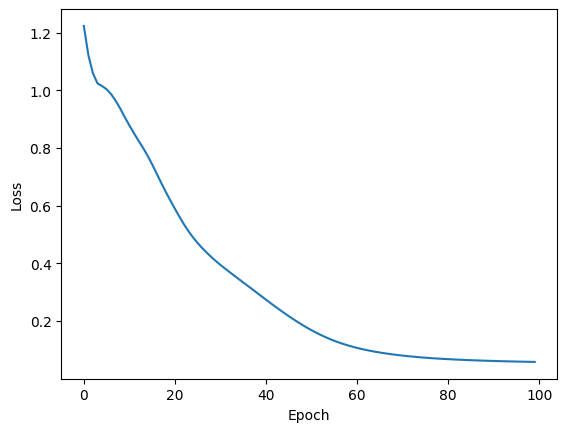

In [17]:
plt.plot(range(epochs),[loss.detach().numpy() for loss in losses])
plt.ylabel('Loss')
plt.xlabel('Epoch');
plt.show()

In [18]:
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.06064259


In [19]:
loss

tensor(0.0606)

In [ ]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)

        print(f'{i+1}).{str(y_val)} {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
        print(f'we got {correct} correct')

        #  The highest value determines the predicted class.
        # i → Represents the current index (0, 1, 2) of the loop iteration.

In [22]:
torch.save(model.state_dict(), 'IrisDatasetModel.pt')

In [23]:
new_model = Model()
new_model.load_state_dict(torch.load('IrisDatasetModel.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=11, bias=True)
  (out): Linear(in_features=11, out_features=3, bias=True)
)

In [24]:
with torch.no_grad():
    y_val = new_model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.06064259
